In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score, classification_report, roc_auc_score
)
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')


In [7]:
df = pd.read_csv(r"C:\Users\lenovo\Desktop\ML PRoject\creditcard.csv")

In [8]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
print(df.info())
print("Missing values:\n", df.isna().sum())
print("Duplicates:", df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
df = df.drop_duplicates()

In [11]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [12]:
df['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

#EDA

In [13]:
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0]

In [14]:
fraud.Amount.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [15]:
non_fraud.Amount.describe()

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

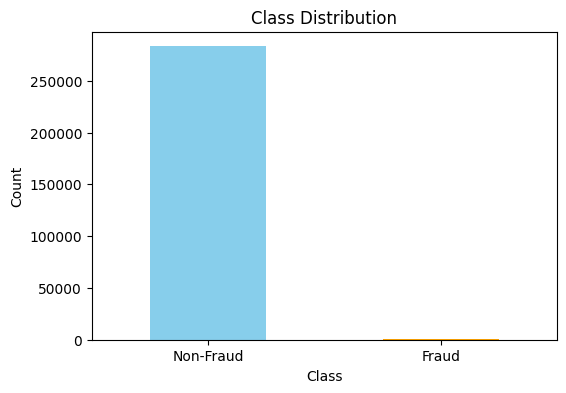

In [16]:
# Class Distribution
plt.figure(figsize=(6, 4))
df['Class'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Class Distribution')
plt.xticks(ticks=[0, 1], labels=['Non-Fraud', 'Fraud'], rotation=0)
plt.ylabel('Count')
plt.show()

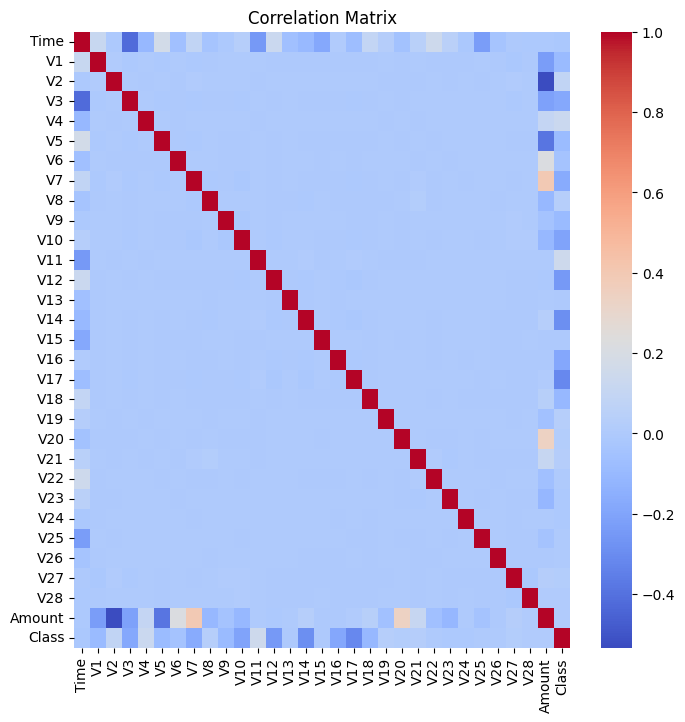

In [17]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

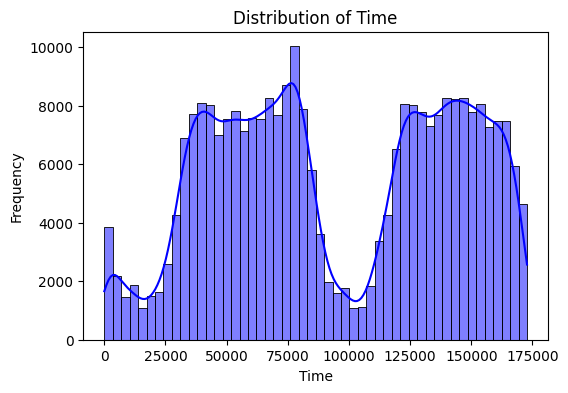

In [18]:
# Time distribution
plt.figure(figsize=(6, 4))
sns.histplot(df['Time'], bins=50, kde=True, color='blue')
plt.title("Distribution of Time")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()

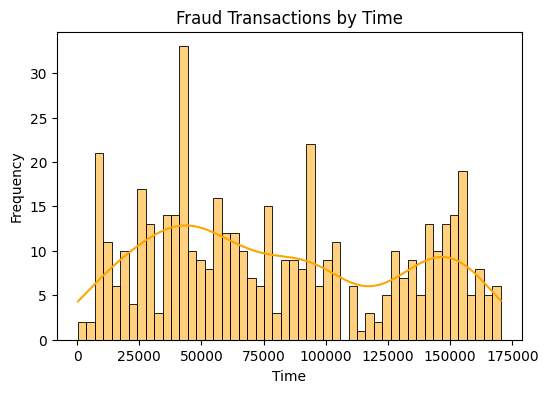

In [19]:
# Fraud transactions by time
plt.figure(figsize=(6, 4))
sns.histplot(df[df['Class']==1]['Time'], bins=50, kde=True, color='orange')
plt.title("Fraud Transactions by Time")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()

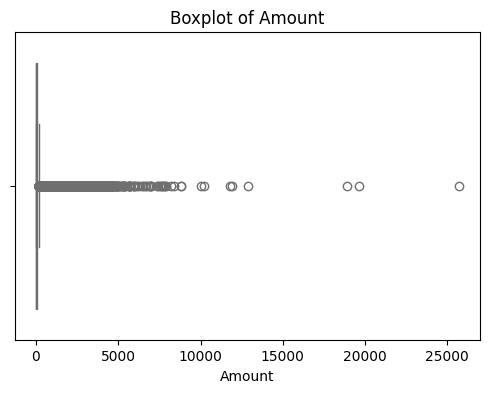

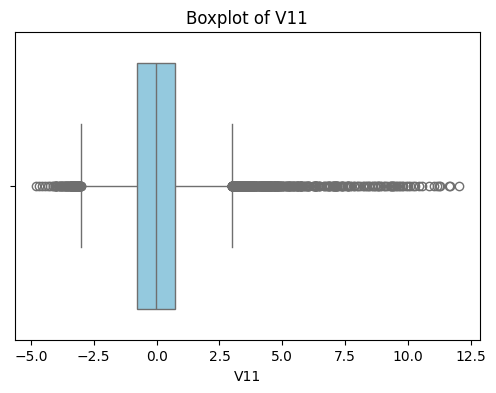

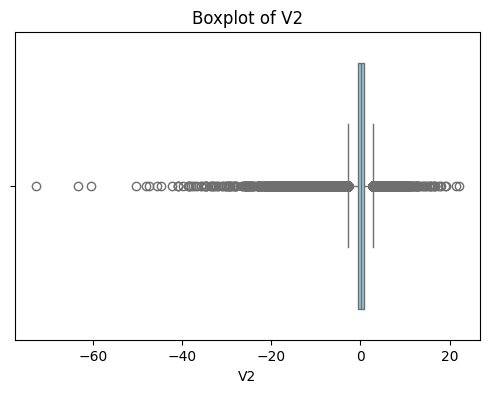

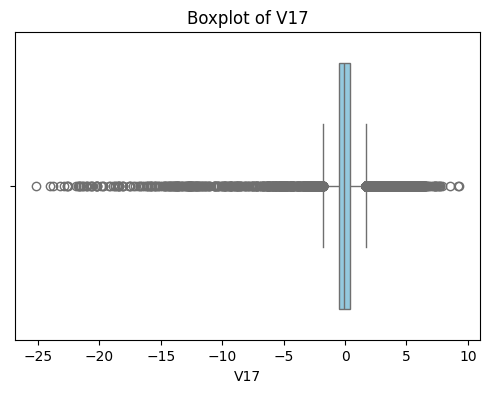

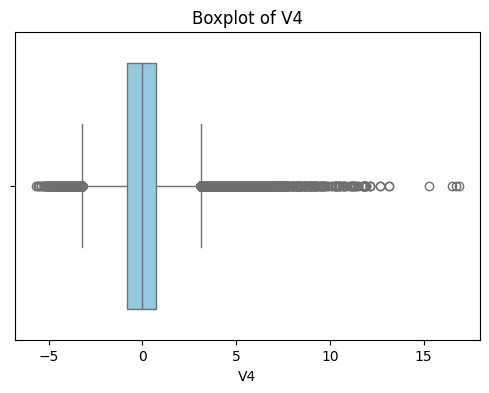

In [20]:
features = ['Amount', 'V11', 'V2', 'V17', 'V4']
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[feature], color='skyblue')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.show()

In [21]:

scaler = StandardScaler()
df[['Time', 'Amount']] = scaler.fit_transform(df[['Time', 'Amount']])

X = df.drop(columns='Class')
y = df['Class']

In [22]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [23]:
# Logistic Regression
LG = LogisticRegression(max_iter=1000, random_state=42)
LG.fit(X_train_resampled, y_train_resampled)

y_pred_test_LG = LG.predict(X_test)

In [24]:
XGB = XGBClassifier(
    n_estimators=500,
    learning_rate=0.1,
    max_depth=4,
    min_child_weight=3,
    subsample=0.7,
    colsample_bytree=0.7,
    gamma=1,
    reg_alpha=2,
    reg_lambda=2,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
XGB.fit(X_train_resampled, y_train_resampled)
y_pred_test_XGB = XGB.predict(X_test)

In [25]:
def evaluate_model(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)
    print(f"\n{name} Performance on Test Data")
    print("-"*40)
    print("Accuracy:", acc)
    print("Precision:", prec)
    print("Recall:", rec)
    print("F1 Score:", f1)
    print("ROC-AUC:", auc)
    print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))
    return [acc, prec, rec, f1, auc]

#Model Comparison

In [26]:

results = {}
results["Logistic Regression"] = evaluate_model("Logistic Regression", y_test, y_pred_test_LG)
results["XGBoost"] = evaluate_model("XGBoost", y_test, y_pred_test_XGB)

results_df = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"]).T
print("\nModel Comparison:\n", results_df)



Logistic Regression Performance on Test Data
----------------------------------------
Accuracy: 0.9737250202657456
Precision: 0.05313700384122919
Recall: 0.8736842105263158
F1 Score: 0.10018105009052504
ROC-AUC: 0.923788496324216

Confusion Matrix:
 [[55172  1479]
 [   12    83]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56651
           1       0.05      0.87      0.10        95

    accuracy                           0.97     56746
   macro avg       0.53      0.92      0.54     56746
weighted avg       1.00      0.97      0.99     56746


XGBoost Performance on Test Data
----------------------------------------
Accuracy: 0.9989426567511367
Precision: 0.6495726495726496
Recall: 0.8
F1 Score: 0.7169811320754716
ROC-AUC: 0.8996381352491571

Confusion Matrix:
 [[56610    41]
 [   19    76]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.0

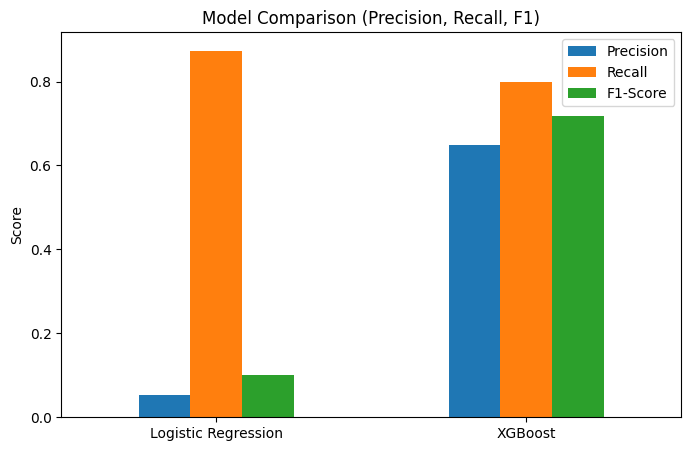

In [27]:

results_df[["Precision","Recall","F1-Score"]].plot(kind="bar", figsize=(8,5))
plt.title("Model Comparison (Precision, Recall, F1)")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()
